### Importing the libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import scipy
import warnings
warnings.filterwarnings('ignore')
import math
from sklearn.preprocessing import StandardScaler

### Read the data

In [2]:
df = pd.read_csv(r"E:\Downloads\Titanic Survival Prediction - cgrinfo\tested.csv")

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.shape

(418, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


### Preprocessing the data

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<AxesSubplot:>

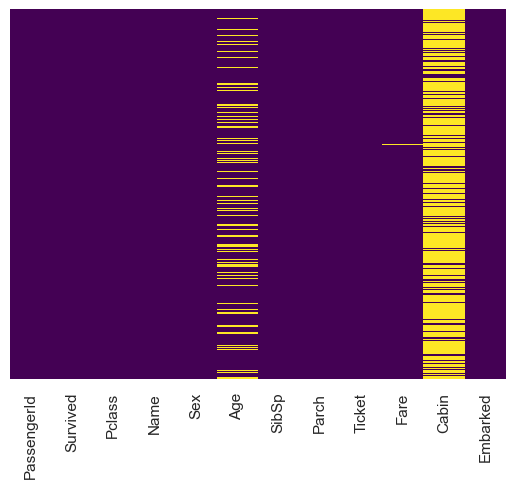

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
df.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

### Data Vizualisation

<AxesSubplot:xlabel='Survived', ylabel='count'>

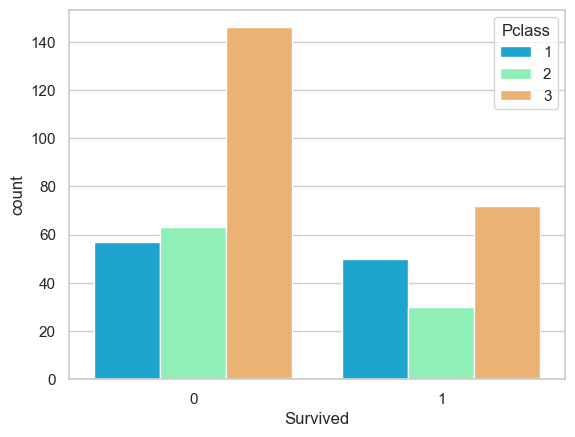

In [11]:
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

<AxesSubplot:xlabel='Survived', ylabel='count'>

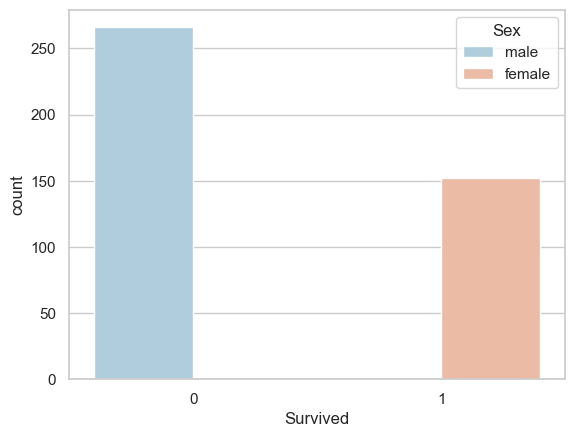

In [12]:
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

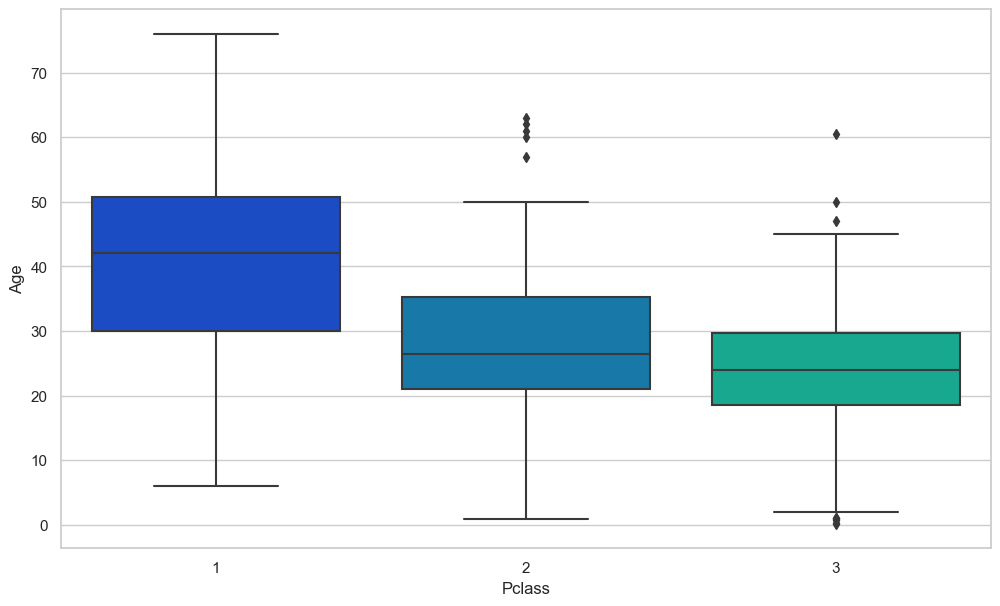

In [13]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

### Drop na values

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
df["Cabin"].value_counts()

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

In [16]:
df["Embarked"].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [17]:
df["Age"].value_counts()

21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: Age, Length: 79, dtype: int64

In [18]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
        
    else:
        return Age

In [19]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)

In [20]:
df['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    24.0
414    39.0
415    38.5
416    24.0
417    24.0
Name: Age, Length: 418, dtype: float64

In [21]:
df['Embarked'] = df['Embarked'].fillna('S')

In [22]:
df['Embarked']

0      Q
1      S
2      Q
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 418, dtype: object

<AxesSubplot:>

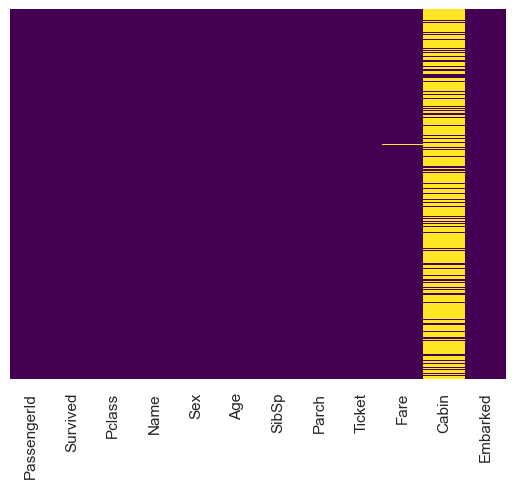

In [23]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


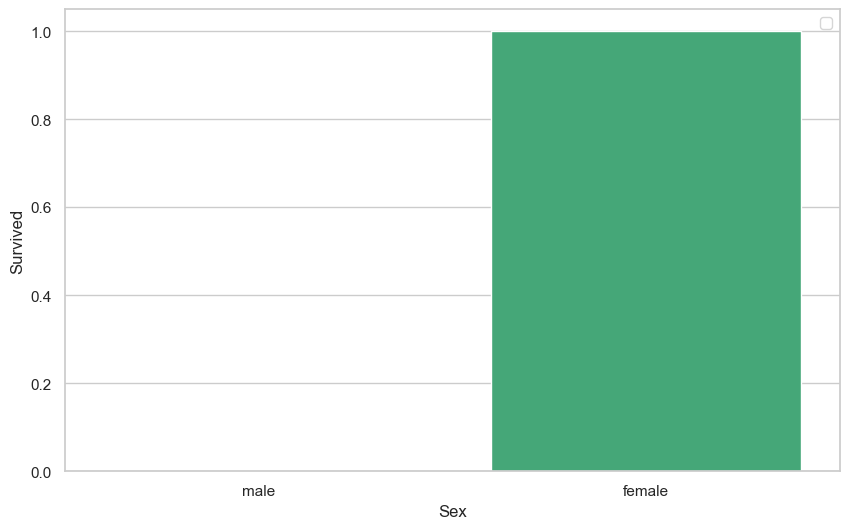

In [24]:
plt.figure(figsize=(10, 6))

sns.barplot(x=df["Sex"] , y=df["Survived"]  ,palette="viridis")
plt.xlabel("Sex")
plt.ylabel("Survived")
plt.legend()

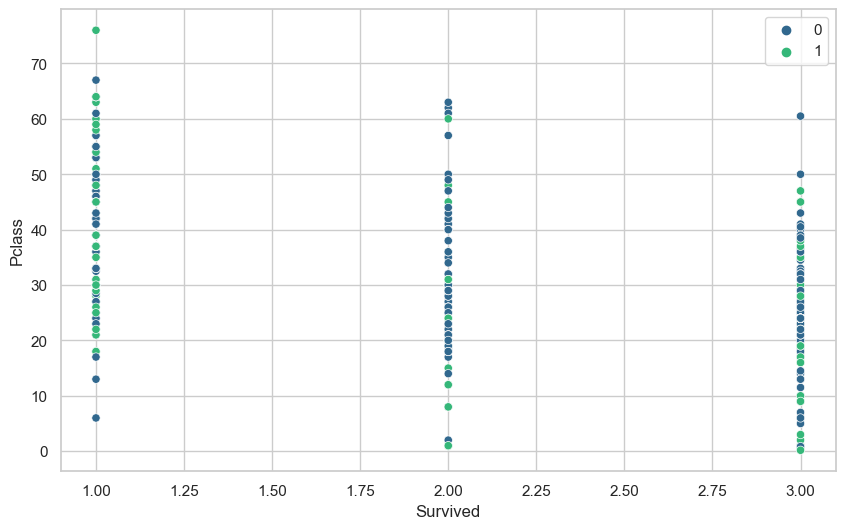

In [25]:
plt.figure(figsize=(10, 6))

sns.scatterplot(y=df["Age"] , x=df["Pclass"] ,hue=df["Survived"] ,palette="viridis")
plt.xlabel("Survived")
plt.ylabel("Pclass")
plt.legend()

In [26]:
df.drop('Cabin', axis=1, inplace=True)

In [27]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [28]:
df["Fare"].value_counts()

7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: Fare, Length: 169, dtype: int64

In [29]:
df= df.dropna(subset=['Fare'])

In [30]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,S


In [31]:
sex = pd.get_dummies(df['Sex'], drop_first=True)
embarked = pd.get_dummies(df['Embarked'], drop_first=True)

In [32]:
df.drop(['Embarked', 'Name', 'Ticket'],axis=1,inplace=True)

In [33]:
df = pd.concat([df,sex,embarked],axis=1)

In [34]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,male,Q,S
0,892,0,3,male,34.5,0,0,7.8292,1,1,0
1,893,1,3,female,47.0,1,0,7.0000,0,0,1
2,894,0,2,male,62.0,0,0,9.6875,1,1,0
3,895,0,3,male,27.0,0,0,8.6625,1,0,1
4,896,1,3,female,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,24.0,0,0,8.0500,1,0,1
414,1306,1,1,female,39.0,0,0,108.9000,0,0,0
415,1307,0,3,male,38.5,0,0,7.2500,1,0,1
416,1308,0,3,male,24.0,0,0,8.0500,1,0,1


In [35]:
x=df[["Pclass" , "Sex" , "Age" , "Fare"]]
y=df["Survived"]

In [36]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x["Sex"] = encoder.fit_transform(x["Sex"])


In [37]:
x["Sex"]

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 417, dtype: int32

In [38]:
x

,Pclass,Sex,Age,Fare
0,3,1,34.5,7.8292
1,3,0,47.0,7.0000
2,2,1,62.0,9.6875
3,3,1,27.0,8.6625
4,3,0,22.0,12.2875
...,...,...,...,...
413,3,1,24.0,8.0500
414,1,0,39.0,108.9000
415,3,1,38.5,7.2500
416,3,1,24.0,8.0500


In [39]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 417, dtype: int64

### Data modeling

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#### DecisionTreeClassifier

In [41]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train , y_train)

DecisionTreeClassifier(random_state=42)

In [42]:
clf.predict([[3 , 0 , 40 , 7]])

array([1], dtype=int64)

In [43]:
clf.score(x_test , y_test)

1.0

In [44]:
y_pred=clf.predict(x_test)

In [45]:
y_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

### confusion matrix

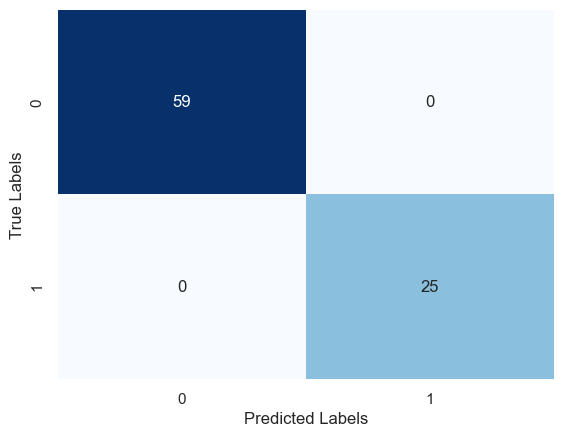

In [46]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### 

### Random forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train , y_train)

RandomForestClassifier(random_state=42)

In [48]:
rfc.score(x_test , y_test)

1.0

In [49]:
rf_pre = rfc.predict(x_test)

In [50]:
print(confusion_matrix(y_test,rf_pre))

[[59  0]
 [ 0 25]]


In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
print(classification_report(y_test,rf_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        25

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



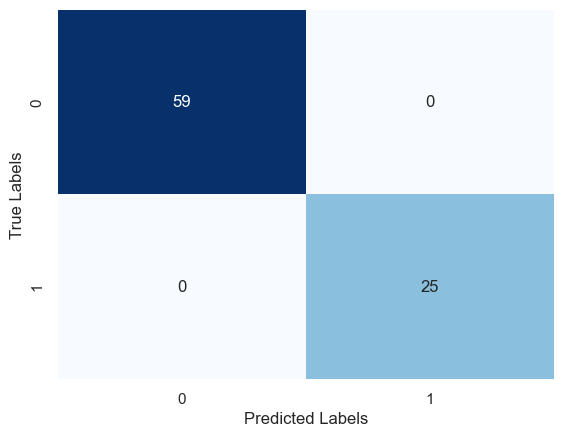

In [53]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, rf_pre)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()